<a href="https://colab.research.google.com/github/tushar2718/bike-sharing-demand-pred-capstone-project/blob/main/Bike__Sharing__Demand__Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Importing libraries

In [ ]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.linear_model import LinearRegression
from IPython.display import SVG
from IPython.display import display
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")


# Data Initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/almabetter/bike sharing pred seoul/SeoulBikeData.csv'
bike_data = pd.read_csv(file_path, encoding= 'unicode_escape')

# Exploratory Data Analysis

## Taking a quick look at our Data

In [ ]:
bike_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# data description for the info
bike_data.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

Looking at Rented bike count, mean is higher than median. So, we got to know there can be outliers.

In [ ]:
#reading no of row and column
bike_data.shape

(8760, 14)

In [ ]:
# all the column or feature
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Finding categorical features in our dataset

In [ ]:
#To find out categorical features in our dataset
bike_data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

There are 14 columns. 10 are numerical and 4 are categorical columns. 'date' column has multiple information, extracting those informations can be insightful.

In [ ]:
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')

bike_data['Seasons'] = pd.Categorical(bike_data['Seasons'], categories=['Winter', 'Spring', 
             'Summer', 'Autumn'])
bike_data['Holiday'] = pd.Categorical(bike_data['Holiday'], categories=['No Holiday', 'Holiday'])
bike_data['Functioning Day'] = pd.Categorical(bike_data['Functioning Day'], categories=['No', 'Yes'])
# convert Hour column integer to Categorical 
bike_data['Hour']=bike_data['Hour'].astype('object')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   object        
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   category      
 12  Holida

# checking for null values

In [ ]:
#data information for null value 
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   object        
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   category      
 12  Holida

# Extracting features from date

In [ ]:
# split day of week, month and year in three column
bike_data['day_of_week'] = bike_data['Date'].dt.day_name() # extract week name from Date column
bike_data['week'] = bike_data['day_of_week'].apply(lambda x:'Weekend' if x=='Saturday' or x =='Sunday' else 'Weekdays')
bike_data["month"] = bike_data['Date'].dt.month_name()   # extract month name from Date column
bike_data['year'] = pd.DatetimeIndex(bike_data['Date']).year.astype("object")   # extract year from Date column and convert it in object type
bike_data.drop(columns='day_of_week',inplace=True)
bike_data.head()

Date  Rented Bike Count Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254    0             -5.2           37   
1 2017-12-01                204    1             -5.5           38   
2 2017-12-01                173    2             -6.0           39   
3 2017-12-01                107    3             -6.2           40   
4 2017-12-01                 78    4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day      week     month  year  
0             Yes  Weekdays  December  2017  
1             Yes  Weekdays  December  2017  
2             Yes  Weekdays  December  2017  
3             Yes  Weekdays  December  2017  
4             Yes  Weekdays  December  2017

In [ ]:
# drop the Date column
bike_data.drop(columns=['Date'],inplace=True)

In [ ]:
# Divide Data in categorical and numerical features
numeric_features= bike_data.select_dtypes(exclude=['object','category'])
categorical_features=bike_data.select_dtypes(include=['object','category'])


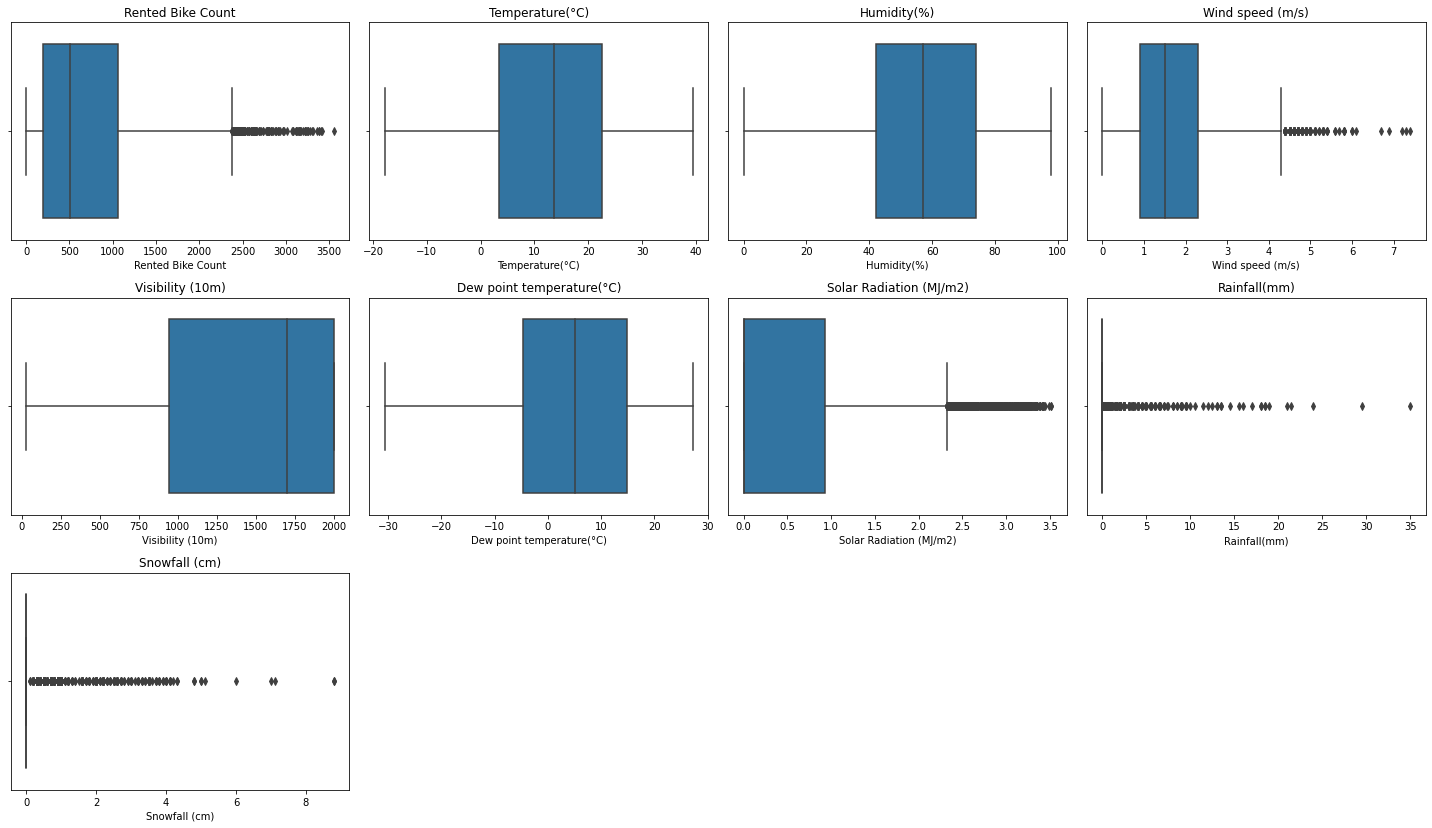

In [ ]:

# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.boxplot(bike_data[i])
  plt.title(i)
  plt.tight_layout()


# Skewness application visualization

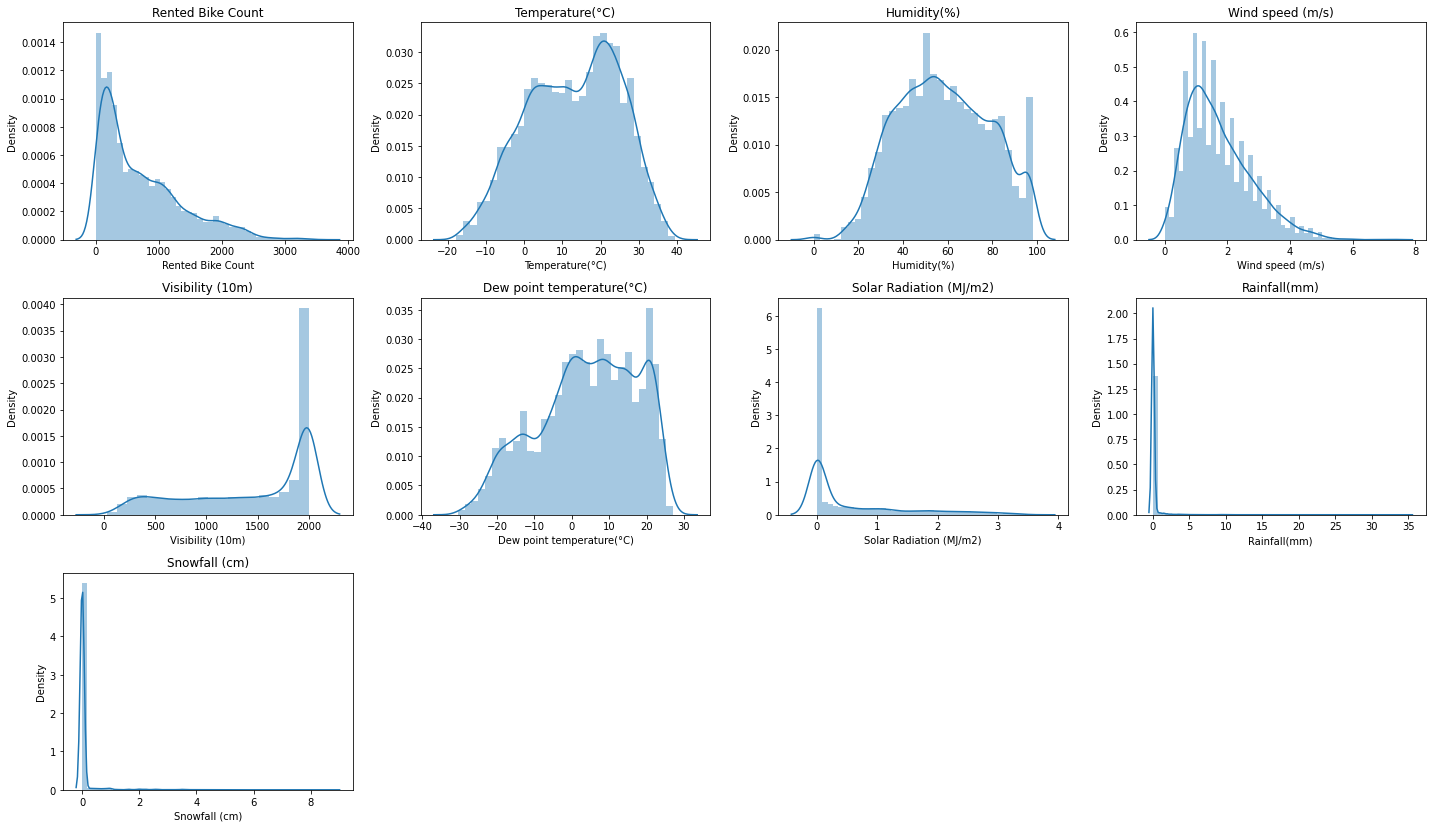

In [ ]:
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.distplot(bike_data[i])
  plt.title(i)
  plt.tight_layout()

In [ ]:
# checkng for no null value
bike_data.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
week                         0
month                        0
year                         0
dtype: int64

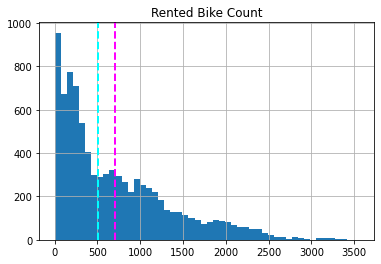

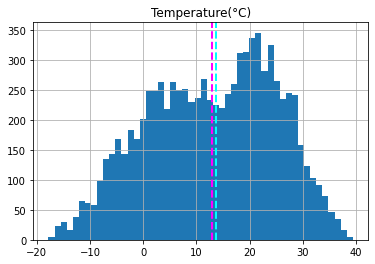

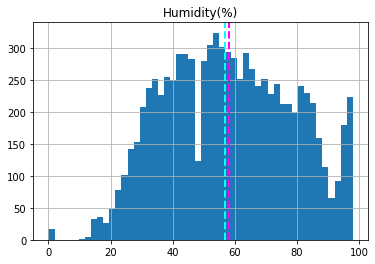

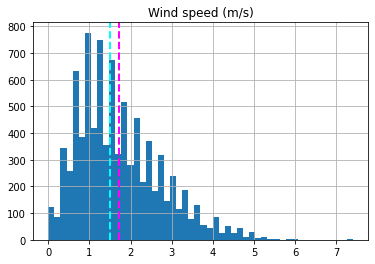

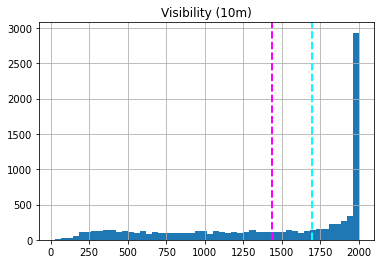

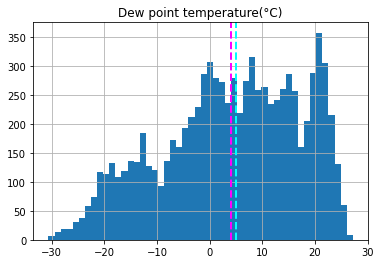

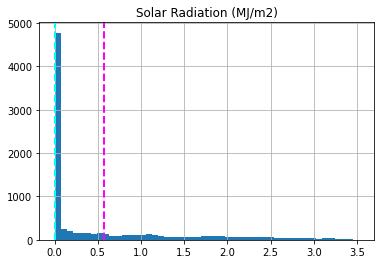

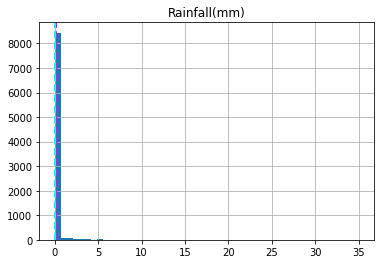

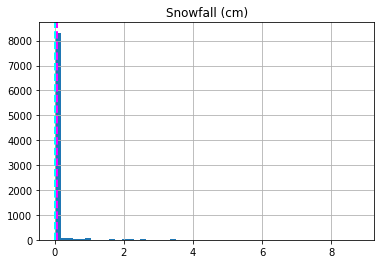

In [ ]:
#plotting histogram of all the numeric features of the dataset
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=bike_data[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)

In this plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms
Right skewed columns are
Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

Left skewed columns are
Visibility (10m), Dew point temperature(°C)

Bar plot also indicates mean and median are skewed which needs to be treated using algorithm

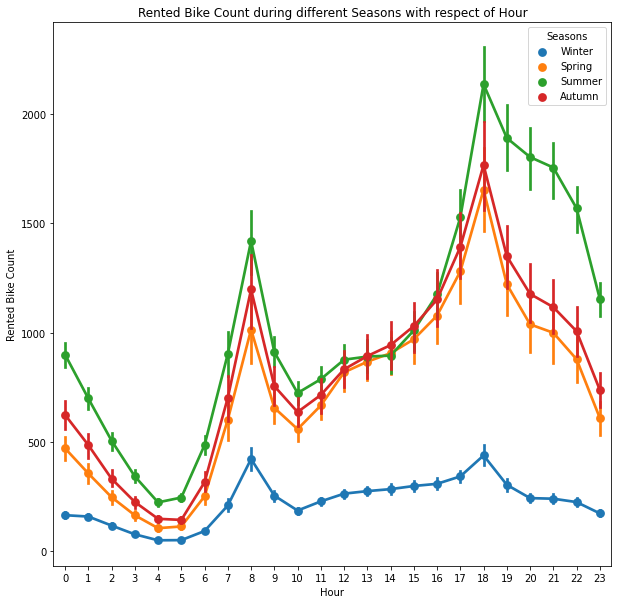

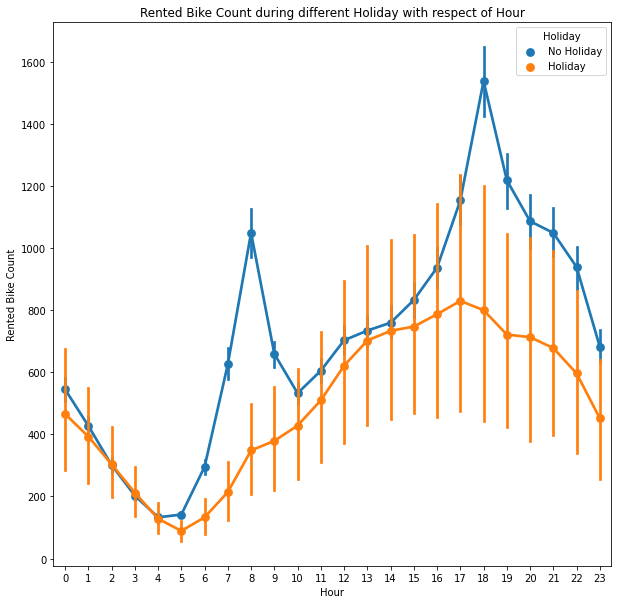

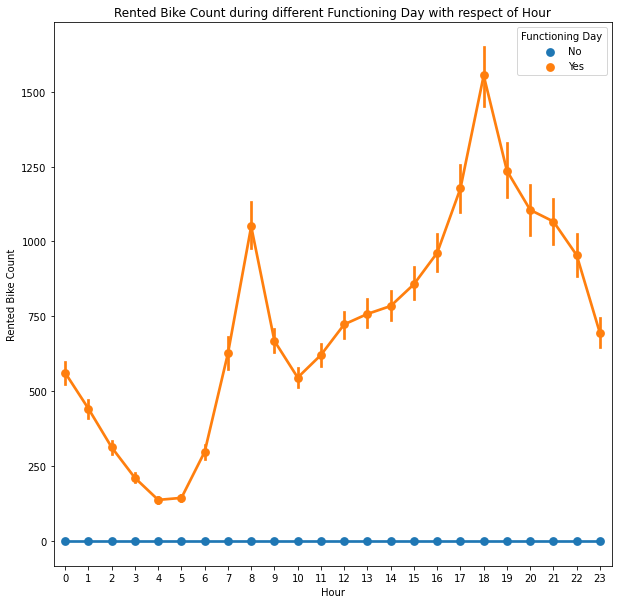

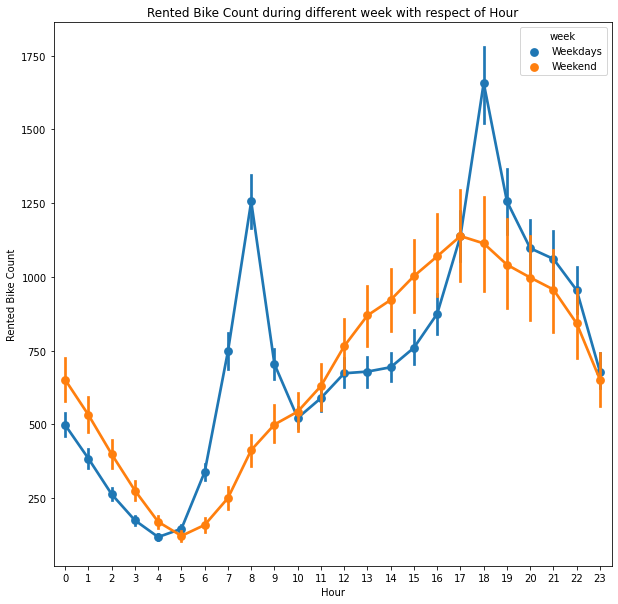

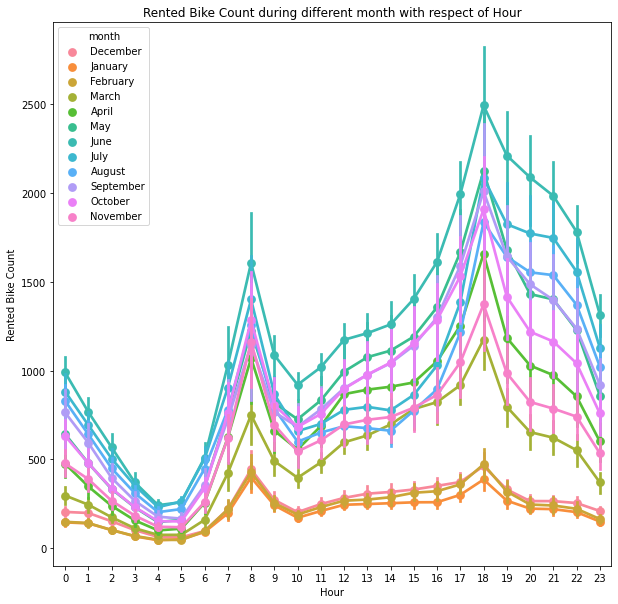

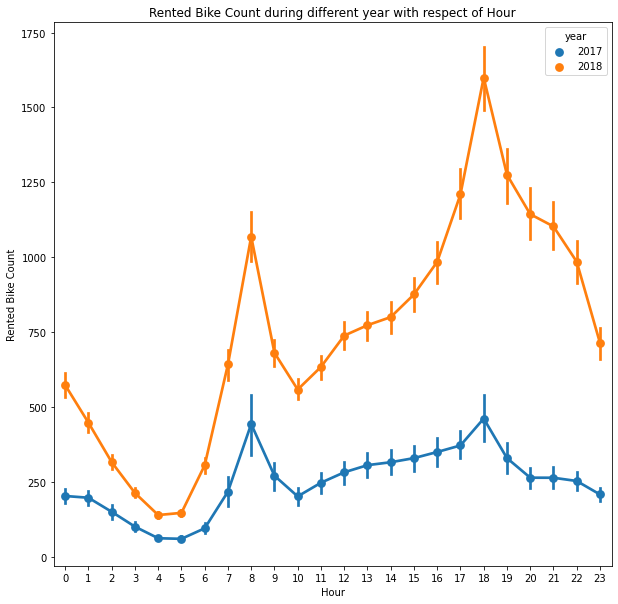

In [ ]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour

for i in categorical_features.columns[1:]:
    plt.figure(figsize=(10,10))
    sns.pointplot(x=bike_data["Hour"],y=bike_data['Rented Bike Count'],hue=bike_data[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
    plt.show()

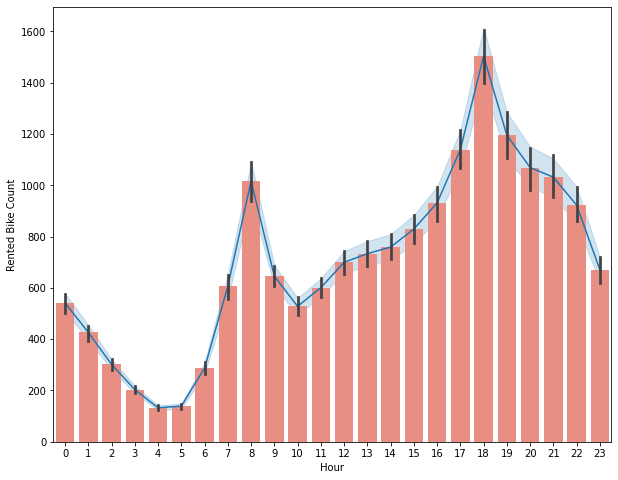

In [ ]:
# bar plot between hr and rented bike count
plt.figure(figsize=(10,8))
sns.lineplot(x = bike_data['Hour'],y = bike_data['Rented Bike Count'])
sns.barplot(x = bike_data['Hour'],y = bike_data['Rented Bike Count'], color="salmon")

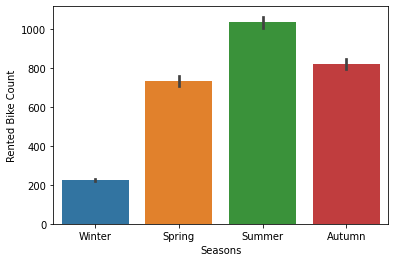

In [ ]:
#Finding relation betwwen seasons and rented bike count. telling us rented bike count on that season.
# sns.set_style('darkgrid')
sns.barplot(x ='Seasons', y ='Rented Bike Count', data = bike_data, palette ='tab10')

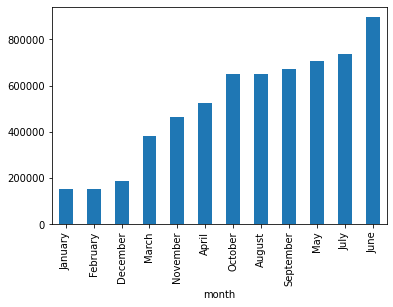

In [ ]:
# month vs bike rented
bike_data.groupby('month')['Rented Bike Count'].sum().sort_values(ascending =True).plot(kind = 'bar')

#Observation
From all these pointplot we have observed a lot from every column like :

#Season
In the season column, we are able to understand that the demand is low in the winter season and highest in summer

#Holiday
In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

#Functioning Day
In the Functioning Day column, If there is no Functioning Day then there is no demand

#Week
In the week column, We can observe from this column that the pattern of weekdays and weekends is different. In the weekend the demand becomes high in the afternoon as people loves to travel during this hour . While the demand during office timings is high in weekdays

#month
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.It is high during July and June time as there might be vacations and peoplr love to enjoy outings

#year
The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it.

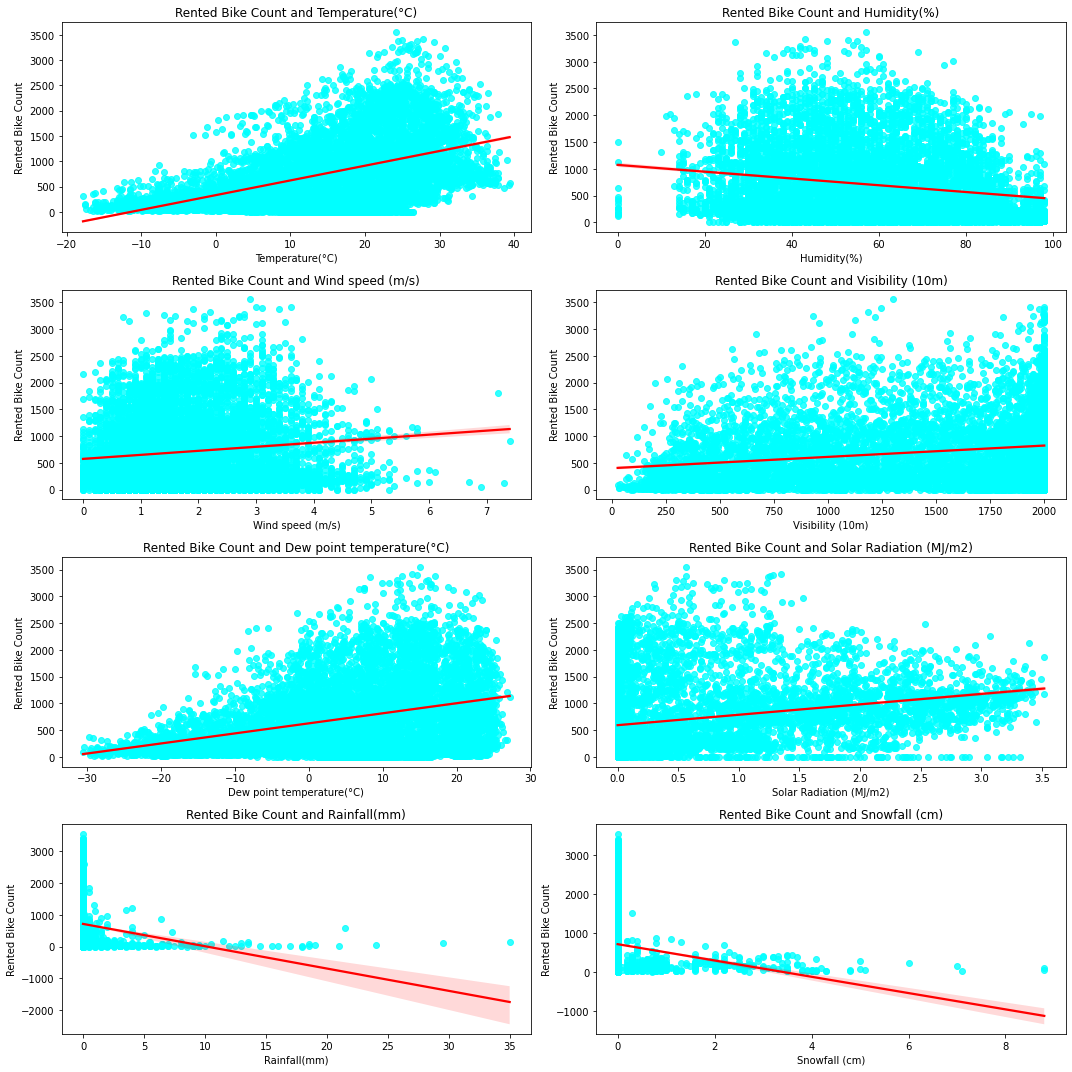

In [ ]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(bike_data[i], bike_data['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Rented Bike Count and {i}')
    plt.tight_layout()

This regression plot clearly shows that some of the numerical features are positively related and some are negatively related to dependant variable

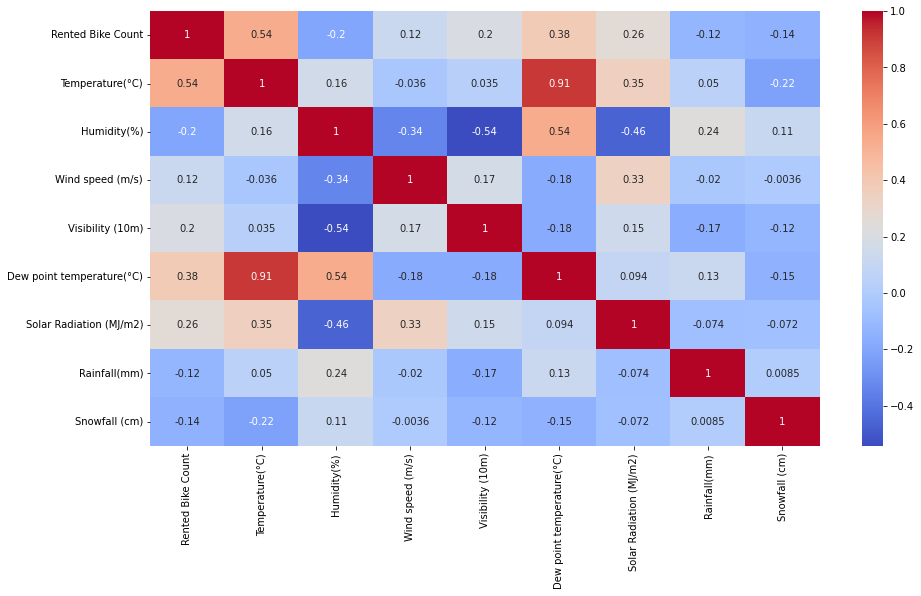

In [ ]:
# year mont co ## Correlation
plt.figure(figsize=(15,8))
correlation = bike_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

From the correlation map it can be clearly seen temperature and dew point temperature are highly correlated . So we can drop dew point temperature column from the dataset We can also check variation inflation factor before dropping it

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count']]])

variables        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6               Rainfall(mm)   1.079919
7              Snowfall (cm)   1.118903

In [ ]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

In [ ]:
# dew point column dropped based on VIF and Corr plot
bike_data.drop(columns = 'Dew point temperature(°C)',inplace =True)

In [ ]:
bike_data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'week', 'month', 'year'],
      dtype='object')

In [ ]:
#one_hot encoding
new_df = pd.get_dummies(bike_data)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Hour_0                   8760 non-null   uint8  
 9   Hour_1                   8760 non-null   uint8  
 10  Hour_2                   8760 non-null   uint8  
 11  Hour_3                   8760 non-null   uint8  
 12  Hour_4                   8760 non-null   uint8  
 13  Hour_5                   8760 non-null   uint8  
 14  Hour_6                  

Text(0.5, 1.0, 'Square root')

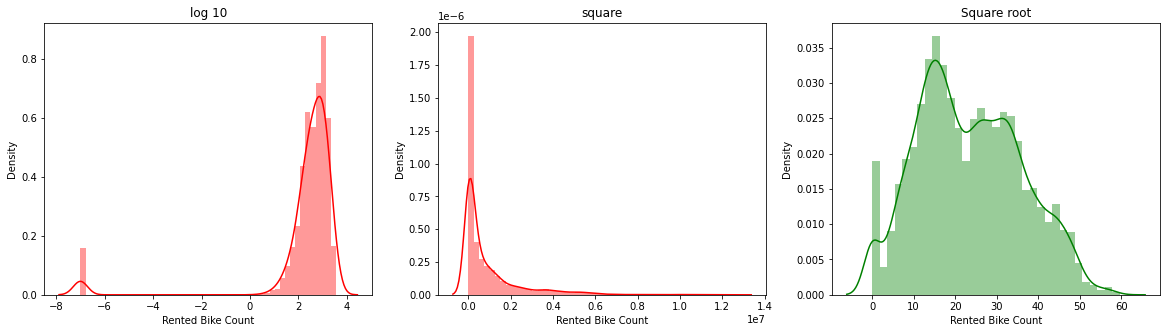

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(new_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((new_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

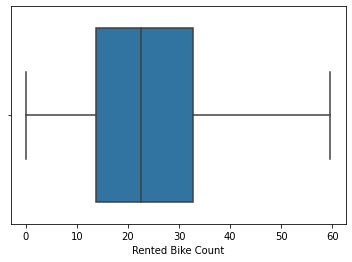

In [ ]:
sns.boxplot(x = np.sqrt(new_df["Rented Bike Count"]))

In [ ]:
X = new_df.drop(columns='Rented Bike Count')
y = np.sqrt(new_df['Rented Bike Count'])

# Exploring Categorical variables

In [ ]:
bike_data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'week', 'month', 'year'],
      dtype='object')

Our Dataset is ready.

# Model Building

# Train Test Split for Model

In [ ]:
#import train-test split lib
from sklearn.model_selection import train_test_split

In [ ]:
# function which split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 55) (7008,)
(1752, 55) (1752,)


In [ ]:
X_train.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Winter', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Autumn',
       'Holiday_No Holiday', 'Holiday_Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'week_Weekdays', 'week_Weekend', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'year_2017',
       'year_2018'],
      dtype='object')

# We will review feature-visualization using Local Interpretable Model Explanations (LIME) and Shapley Additive Explanation (SHAP).

In [ ]:
!pip install lime
from lime import lime_tabular
model = LinearRegression()   
model.fit(X_train, y_train)
# LIME has one explainer for all the models
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), feature_names=X_train.columns, 
                                              class_names=['Rented Bike Count'], verbose=True, mode='regression')
           
# Choose the 5th instance and use it to predict the results 
j = 5
exp = explainer.explain_instance(X_test.iloc[j], model.predict, num_features=6)
# Show the predictions
exp.show_in_notebook(show_table=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Intercept -53886850353.66497
Prediction_local [-6.07836878e+09]
Right: 13.530437469482422


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# In this project we are using Nine model on our data set for getting best performance:-
LINEAR REGRESSION

LASSO REGRESSION

RIDGE REGRESSION

ELASTICNET REGRESSION

POLYNOMIAL

GRADIENT BOOSTING

DECISION TREE

RANDOM FORREST

XGBOOST

# Linear Regression Model

linear regression have some assumptions, given below are the basic assumptions that a linear regression model makes regarding a dataset on which it is applied:

Linear relationship: Relationship between response and feature variables should be linear. The linearity assumption can be tested using scatter plots.
Little or no multi-collinearity: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other.
Little or no auto-correlation: Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
Homoscedasticity: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent

In [ ]:
#importing linear regression model
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# all coeffient
reg.score(X_train, y_train)

0.7771965472543884

In [ ]:
#diffresnt coefficient for different features
reg.coef_

array([ 6.06389803e+00, -2.59176133e+00, -1.81442547e-02,  5.18914438e-01,
        6.47183063e-01, -1.71153648e+00, -1.67509685e-02, -3.83384453e+11,
       -3.72759722e+11, -3.77177681e+11, -3.83998559e+11, -3.69565736e+11,
       -3.84611494e+11, -3.77803822e+11, -3.83384453e+11, -3.77177681e+11,
       -3.86443325e+11, -3.76550303e+11, -3.74028303e+11, -3.85833872e+11,
       -3.78428733e+11, -3.89473456e+11, -3.77177681e+11, -3.79052420e+11,
       -3.80296146e+11, -3.76550303e+11, -3.75921682e+11, -3.83384453e+11,
       -3.75921682e+11, -3.74660689e+11, -3.87658789e+11, -1.19783461e+12,
        6.55915958e+12,  6.35520573e+12,  5.55516558e+12,  1.56769822e+10,
        1.56769822e+10, -4.67582195e+11, -4.67582195e+11, -3.18588287e+11,
       -3.18588287e+11,  9.09035722e+11,  1.04120825e+12,  6.03216247e+10,
        5.67981214e+12,  5.86631712e+12,  1.05975114e+12,  1.04202439e+12,
        9.26145919e+11,  9.26145919e+11,  1.53557775e+12,  1.55985690e+12,
        1.57416629e+12,  

In [ ]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34.1712639408819
RMSE : 5.845619209363701
R2 : 0.7771965472543884
Adjusted R2 : 0.7699711994353975


In [ ]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 36.44312929853443
RMSE : 6.036814499264859
R2 : 0.7743096534955213
Adjusted R2 : 0.7669906858907181


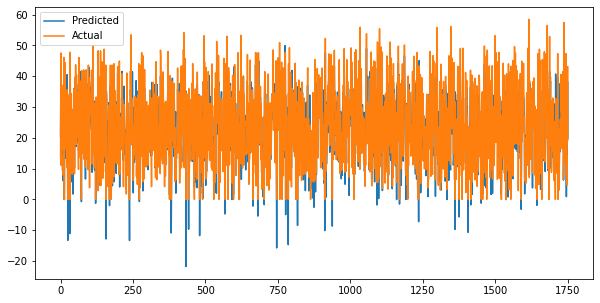

In [ ]:
#predicted vs actual for test data
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Implementing lasso Regression

In [ ]:
#importing lasso regression model
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
# lasso score 
lasso.score(X_train, y_train)

0.7736412980946654

In [ ]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# mterics for lasso regressor for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.39843549583655
RMSE : 6.11542602733747
R2 : 0.7683934934171478
Adjusted R2 : 0.7608826692060293


In [ ]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

MSE : 34.716530883181946
RMSE : 5.892073563965571
R2 : 0.7736412980946654
Adjusted R2 : 0.7718504855795916


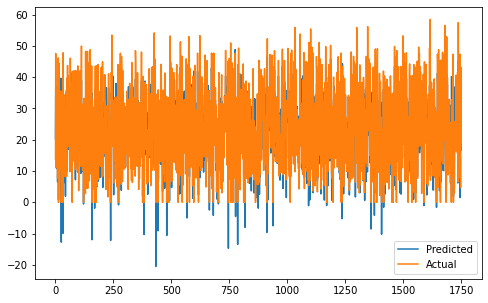

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual,predicted)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual,predicted)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual,predicted))
  print("Adjusted R2 : ",1-(1-r2_score(actual, predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

#CROSS VALIDATION LASSO

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -34.83367433947204


In [ ]:
lasso_pred_train = lasso_regressor.predict(X_train)
lasso_pred_test = lasso_regressor.predict(X_test)

In [ ]:
score_metrics(y_train,lasso_pred_train)

mean absolute error is  : 4.43162848086301
mean squared error is  : 34.177691433496925
Root mean squared error is  : 5.846168953553851
R2 score is  : 0.7771546387212536
Adjusted R2 :  0.7699279318401622


In [ ]:
score_metrics(y_test,lasso_pred_test)

mean absolute error is  : 4.544427270970005
mean squared error is  : 36.49237642512107
Root mean squared error is  : 6.040892022302756
R2 score is  : 0.774004668680067
Adjusted R2 :  0.7666758106478758


# Implementing Ridge Regression

In [ ]:
#importing ridge regression
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# ridge score
ridge.score(X_train, y_train)

0.7771970653183613

In [ ]:
#y pred  ridge test and train
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# metrics for ridge regression
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34.17118448564664
RMSE : 5.8456124132246945
R2 : 0.7771970653183613
Adjusted R2 : 0.769971734299794


In [ ]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 36.43855863912306
RMSE : 6.036435921893237
R2 : 0.7743379593442824
Adjusted R2 : 0.7670199096767916


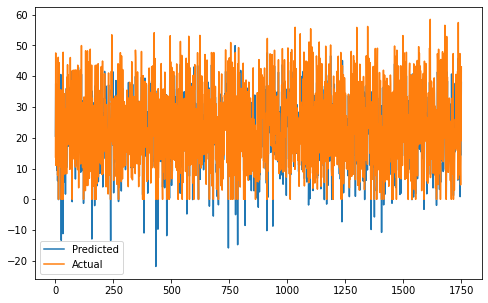

In [ ]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
##CROSS VALIDATION ON RIDGE

from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -34.96598582370359


In [ ]:

y_pred_ridge_train = ridge_regressor.predict(X_train)
score_metrics(y_train,y_pred_ridge_train)

mean absolute error is  : 4.431992438434117
mean squared error is  : 34.173957703062605
Root mean squared error is  : 5.845849613449067
R2 score is  : 0.7771789833879837
Adjusted R2 :  0.7699530659860611


In [ ]:

y_pred_ridge = ridge_regressor.predict(X_test)
score_metrics(y_test,y_pred_ridge)

mean absolute error is  : 4.543746355237172
mean squared error is  : 36.461674440033676
Root mean squared error is  : 6.038350307826938
R2 score is  : 0.7741948044281799
Adjusted R2 :  0.7668721123548012


# Implementing Elastic Net Regressor

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#elastic net score
elasticnet.score(X_train, y_train)

0.7731954629593634

In [ ]:
#y_predict for train and test dataset
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
#metrics for the elasticnet regression on train
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34.784908414565706
RMSE : 5.897873211130069
R2 : 0.7731954629593634
Adjusted R2 : 0.765840362996371


In [ ]:
#metrics for the elasticnet regression on test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.44009149053679
RMSE : 6.11883089246114
R2 : 0.7681355200746044
Adjusted R2 : 0.7606163299826841


##CROSS VALIDATION ON ELASTICNET

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -34.83380073186348


In [ ]:
y_pred_elastic_train = elastic_regressor.predict(X_train)
score_metrics(y_train,y_pred_elastic_train)

mean absolute error is  : 4.432375516043353
mean squared error is  : 34.1788928481222
Root mean squared error is  : 5.846271704951986
R2 score is  : 0.7771468052584014
Adjusted R2 :  0.7699198443440217


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)
score_metrics(y_test,y_pred_elastic)


mean absolute error is  : 4.545168558723447
mean squared error is  : 36.49815439595863
Root mean squared error is  : 6.0413702415891235
R2 score is  : 0.7739688860163518
Adjusted R2 :  0.7666388675793822


## POLYNOMIAL 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [ ]:
poly_X_train[:5]

array([[ 1.        ,  1.04718604,  1.3220657 , ...,  0.09107894,
        -0.09107894,  0.09107894],
       [ 1.        ,  0.93804259,  0.73123665, ...,  0.09107894,
        -0.09107894,  0.09107894],
       [ 1.        , -0.92579175,  0.33735063, ...,  0.09107894,
        -0.09107894,  0.09107894],
       [ 1.        , -1.65621331, -0.40118568, ...,  0.09107894,
        -0.09107894,  0.09107894],
       [ 1.        ,  0.50146878,  1.9621305 , ...,  0.09107894,
        -0.09107894,  0.09107894]])

In [ ]:
poly_reg = LinearRegression().fit(poly_X_train,y_train)
poly_reg.score(poly_X_train,y_train)

0.927674916573848

In [ ]:
poly_pred_train = poly_reg.predict(poly_X_train)
score_metrics(y_train,poly_pred_train)

mean absolute error is  : 2.216170697878103
mean squared error is  : 11.09246506212422
Root mean squared error is  : 3.330535251596088
R2 score is  : 0.927674916573848
Adjusted R2 :  0.9253294687033066


In [ ]:
poly_pred = poly_reg.predict(poly_X_test)
score_metrics(y_test,poly_pred)

mean absolute error is  : 2.540555159818376
mean squared error is  : 17.294550585913548
Root mean squared error is  : 4.158671733367945
R2 score is  : 0.8928957751569641
Adjusted R2 :  0.8894224659786817


# Implementing of decision tree by using decision tree regressor

In [ ]:
#importing the decision tree model for training 
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [ ]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.6727112446627532
MSE : 50.19612715015279
RMSE : 7.0849225225229375
R2 : 0.6727112446627532
Adjusted R2 : 0.6620975173375477


In [ ]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.83493013835919
RMSE : 7.129861859696805
R2 : 0.6851820022514191
Adjusted R2 : 0.6749726921829216


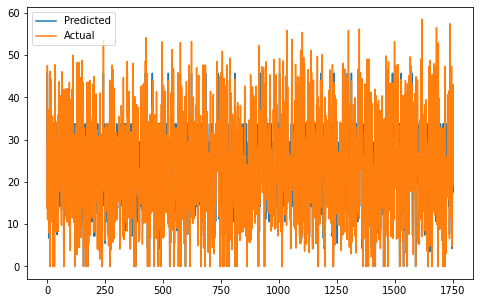

In [ ]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Implementing Random forest Rergressor

In [ ]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data in rf

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9902592152502779
MSE : 1.4939397149024891
RMSE : 1.2222682663402864
R2 : 0.9902592152502779
Adjusted R2 : 0.9899433289523801


In [ ]:
#metric score for the rf for test dataset
print("Model Score:",rf_model.score(X_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.931351425805617
MSE : 11.084961781811458
RMSE : 3.329408623436219
R2 : 0.931351425805617
Adjusted R2 : 0.9291252043547379


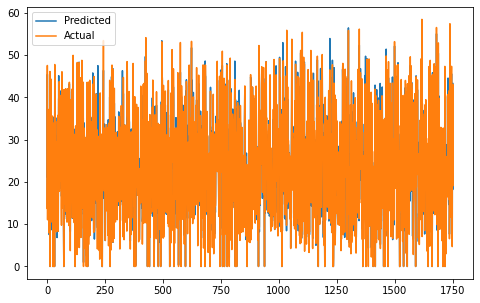

In [ ]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# random forest important feature selection
rf_model.feature_importances_

array([3.06299464e-01, 1.48740012e-01, 1.10365840e-02, 1.11448892e-02,
       3.37005531e-02, 3.31742536e-02, 1.26414376e-03, 3.27928347e-03,
       4.25193258e-03, 1.30884864e-02, 2.20901318e-02, 2.88779742e-02,
       2.68741370e-02, 9.23721432e-03, 3.86365496e-03, 1.52339383e-02,
       1.07776847e-03, 2.14606129e-03, 9.07454729e-04, 7.05366188e-04,
       2.74803467e-04, 4.06035207e-04, 1.34416414e-03, 3.31075311e-03,
       9.81525451e-03, 3.08234623e-02, 1.61577168e-02, 1.26708154e-02,
       1.23202745e-02, 9.13749733e-03, 4.76099821e-03, 5.32141774e-03,
       1.81261876e-03, 9.26452121e-04, 1.45106305e-02, 2.04252368e-03,
       2.05012062e-03, 7.99545254e-02, 7.99087672e-02, 1.06141375e-02,
       9.05475976e-03, 1.11606552e-03, 2.37721225e-03, 2.24855165e-04,
       2.76731188e-04, 2.05335460e-04, 7.51906929e-04, 2.63662185e-03,
       3.58374779e-03, 1.17427282e-03, 9.74867600e-04, 1.10821783e-03,
       8.63219753e-04, 2.19424988e-04, 2.76488784e-04])

In [ ]:
importance_rf_df=rf_model.feature_importances_

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features=X.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)

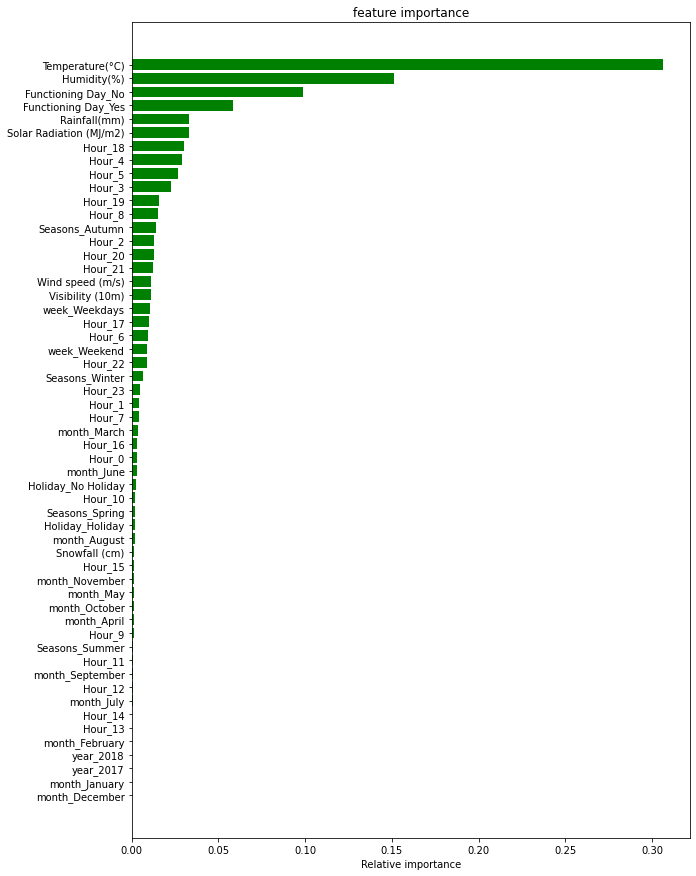

In [ ]:
plt.figure(figsize=(10,15))
plt.title("feature importance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()    

# Training Random forest Regressor from GridesearchCV

In [ ]:
# number of trees
n_estimators=[50,80,100]

#max deapth of tree
max_depth=[4,6,8]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

# Importing Random forest Regressor

In [ ]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [ ]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7956004668286881
MSE : 31.348663188647613
RMSE : 5.5989876932038
R2 : 0.7956004668286881
Adjusted R2 : 0.7889719442317411


In [ ]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7956004668286881
MSE : 35.758794204840854
RMSE : 5.979865734683418
R2 : 0.7785477040524774
Adjusted R2 : 0.7713661732287076


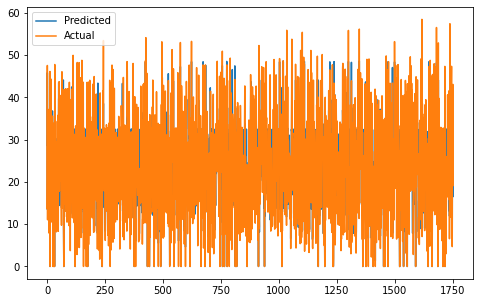

In [ ]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_r_g)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# for the important features
rf_optimal_model.feature_importances_

array([3.76156169e-01, 1.87626374e-01, 1.37563430e-03, 1.83539132e-03,
       3.11120135e-02, 3.07350332e-02, 1.86478800e-04, 1.24631708e-04,
       0.00000000e+00, 2.29158941e-03, 1.40326741e-02, 2.00383173e-02,
       1.41278865e-02, 8.65048607e-04, 0.00000000e+00, 3.23868636e-03,
       0.00000000e+00, 1.12836070e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.56601310e-03, 3.33095232e-02, 1.82206464e-02, 1.16035433e-02,
       1.01898120e-02, 5.96127567e-03, 3.05566225e-03, 7.00058940e-03,
       1.23520704e-03, 2.60686968e-04, 1.35761567e-02, 0.00000000e+00,
       3.51351944e-05, 9.83322576e-02, 1.03494521e-01, 5.19059086e-04,
       8.76537065e-04, 2.83099416e-05, 0.00000000e+00, 4.25170924e-05,
       2.87297667e-05, 8.07233183e-06, 0.00000000e+00, 2.17137840e-05,
       3.72861869e-04, 1.89191869e-05, 6.52695240e-05, 1.24181900e-03,
       0.00000000e+00, 8.88545931e-05, 8.90951285e-05])

In [ ]:
#important feature selection
importance_rf_gd=rf_optimal_model.feature_importances_
imortance_rf_gddict={"Feature":list(X.columns),"Feature importance":importance_rf_gd}
imortance_rf_gddf=pd.DataFrame(imortance_rf_gddict)

In [ ]:
imortance_rf_gddf['Feature importance'] = round(imortance_rf_gddf['Feature importance'],2)

In [ ]:
#reading table of important features
imortance_rf_gddf.head()

Feature  Feature importance
0          Temperature(°C)                0.38
1              Humidity(%)                0.19
2         Wind speed (m/s)                0.00
3         Visibility (10m)                0.00
4  Solar Radiation (MJ/m2)                0.03

In [ ]:
#feature in ascending order
imortance_rf_gddf.sort_values(by=["Feature importance"],ascending=False)

Feature  Feature importance
0           Temperature(°C)                0.38
1               Humidity(%)                0.19
38      Functioning Day_Yes                0.10
37       Functioning Day_No                0.10
4   Solar Radiation (MJ/m2)                0.03
5              Rainfall(mm)                0.03
25                  Hour_18                0.03
11                   Hour_4                0.02
26                  Hour_19                0.02
24                  Hour_17                0.01
34           Seasons_Autumn                0.01
31           Seasons_Winter                0.01
29                  Hour_22                0.01
28                  Hour_21                0.01
27                  Hour_20                0.01
12                   Hour_5                0.01
10                   Hour_3                0.01
15                   Hour_8                0.00
2          Wind speed (m/s)                0.00
39            week_Weekdays                0.00
40             week_Weekend                0.00
41              month_April                0.00
42             month_August                0.00
43           month_December                0.00
44           month_February                0.00
45            month_January                0.00
36          Holiday_Holiday                0.00
46               month_July                0.00
47               month_June                0.00
48              month_March                0.00
49                month_May                0.00
50           month_November                0.00
51            month_October                0.00
52          month_September                0.00
53                year_2017                0.00
3          Visibility (10m)                0.00
35       Holiday_No Holiday                0.00
16                   Hour_9                0.00
6             Snowfall (cm)                0.00
17                  Hour_10                0.00
18                  Hour_11                0.00
19                  Hour_12                0.00
20                  Hour_13                0.00
21                  Hour_14                0.00
22                  Hour_15                0.00
23                  Hour_16                0.00
14                   Hour_7                0.00
13                   Hour_6                0.00
9                    Hour_2                0.00
8                    Hour_1                0.00
30                  Hour_23                0.00
7                    Hour_0                0.00
32           Seasons_Spring                0.00
33           Seasons_Summer                0.00
54                year_2018                0.00

In [ ]:
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
features=X.columns
importance_rfgd=rf_optimal_model.feature_importances_
indices=np.argsort(importance_rfgd)

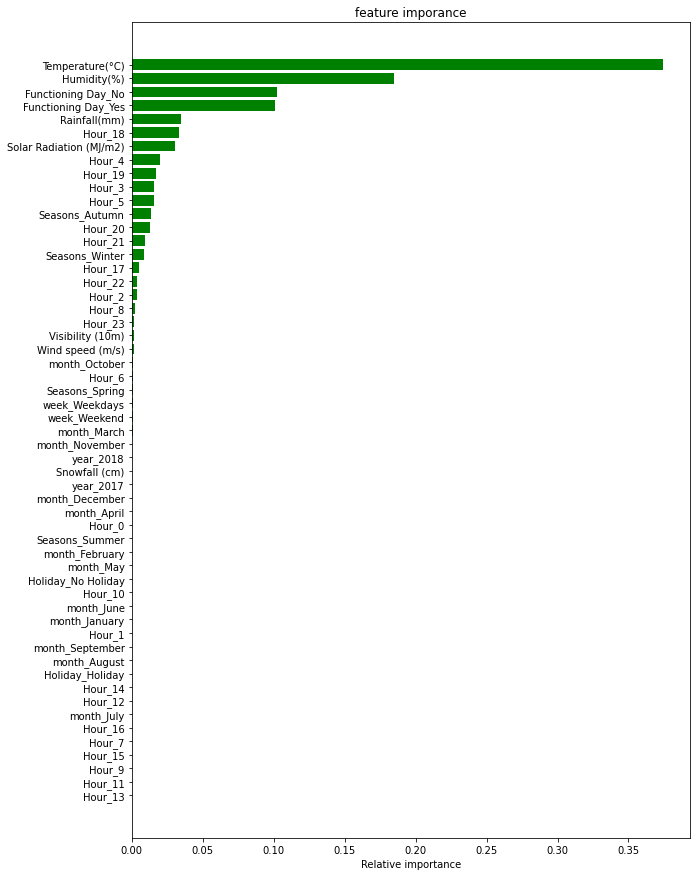

In [ ]:
#barh plot for important features 
plt.figure(figsize=[10,15])
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rfgd[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()  


# Implementing Gradient Boosting Regression

In [ ]:
# gradient boosting model import
gbd_model=GradientBoostingRegressor()
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_gb = gbd_model.predict(X_train)
y_pred_test_gb = gbd_model.predict(X_test)

In [ ]:
# for train data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8806125168483553
MSE : 18.310403845807524
RMSE : 4.2790657678759185
R2 : 0.8806125168483553
Adjusted R2 : 0.8767408708735083


In [ ]:
# for test data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_gb))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8806125168483553
MSE : 22.231772892757927
RMSE : 4.715058100676802
R2 : 0.8623198220308377
Adjusted R2 : 0.857854957768866


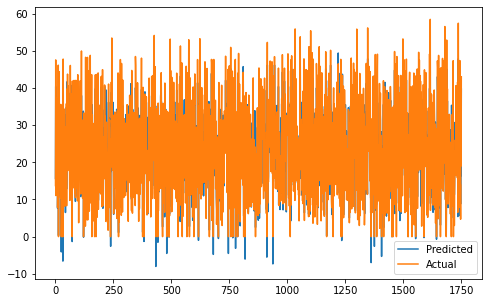

In [ ]:
#pred vs actual for Gradient boosting
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_gb)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

feature importance

In [ ]:
#feature importance
gbd_model.feature_importances_

array([3.04710741e-01, 1.17836990e-01, 1.34300021e-03, 1.13145325e-04,
       5.35247229e-02, 5.90163340e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.15620897e-03, 1.53640904e-02, 2.38096402e-02,
       2.46927463e-02, 5.77950107e-03, 1.28657185e-03, 8.97826983e-03,
       0.00000000e+00, 2.87895151e-03, 1.16391575e-03, 0.00000000e+00,
       0.00000000e+00, 3.42492992e-05, 0.00000000e+00, 3.65565368e-04,
       7.04432683e-03, 2.81674966e-02, 1.65428516e-02, 1.29449171e-02,
       1.68146688e-02, 1.40852405e-02, 1.31456930e-03, 3.55592030e-02,
       0.00000000e+00, 6.69131696e-05, 1.40713566e-02, 2.21290251e-03,
       9.54273399e-04, 6.82494462e-02, 1.25126917e-01, 6.70060567e-03,
       1.09200061e-02, 0.00000000e+00, 1.88939697e-03, 3.03843944e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.33929821e-03,
       3.22524692e-04, 2.06509241e-03, 3.48620842e-04, 2.49545043e-03,
       1.40994488e-04, 1.66293610e-04, 9.81462376e-05])

In [ ]:
#creating a data frame for important features
importances_gb = gbd_model.feature_importances_

importance_dictgb = {'Feature' : list(X.columns),
                   'Feature Importance' : importances_gb}

importance_dfgb = pd.DataFrame(importance_dictgb)

In [ ]:
importance_dfgb['Feature Importance'] = round(importance_dfgb['Feature Importance'],2)

In [ ]:
#reading the important features
importance_dfgb.head()

Feature  Feature Importance
0          Temperature(°C)                0.30
1              Humidity(%)                0.12
2         Wind speed (m/s)                0.00
3         Visibility (10m)                0.00
4  Solar Radiation (MJ/m2)                0.05

In [ ]:
importance_dfgb.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature(°C)                0.30
38      Functioning Day_Yes                0.13
1               Humidity(%)                0.12
37       Functioning Day_No                0.07
5              Rainfall(mm)                0.06
4   Solar Radiation (MJ/m2)                0.05
31           Seasons_Winter                0.04
25                  Hour_18                0.03
10                   Hour_3                0.02
11                   Hour_4                0.02
12                   Hour_5                0.02
28                  Hour_21                0.02
26                  Hour_19                0.02
39            week_Weekdays                0.01
24                  Hour_17                0.01
40             week_Weekend                0.01
29                  Hour_22                0.01
47               month_June                0.01
34           Seasons_Autumn                0.01
27                  Hour_20                0.01
9                    Hour_2                0.01
15                   Hour_8                0.01
13                   Hour_6                0.01
20                  Hour_13                0.00
46               month_July                0.00
41              month_April                0.00
42             month_August                0.00
43           month_December                0.00
44           month_February                0.00
45            month_January                0.00
2          Wind speed (m/s)                0.00
6             Snowfall (cm)                0.00
48              month_March                0.00
49                month_May                0.00
50           month_November                0.00
51            month_October                0.00
52          month_September                0.00
53                year_2017                0.00
3          Visibility (10m)                0.00
8                    Hour_1                0.00
7                    Hour_0                0.00
21                  Hour_14                0.00
36          Holiday_Holiday                0.00
35       Holiday_No Holiday                0.00
33           Seasons_Summer                0.00
32           Seasons_Spring                0.00
30                  Hour_23                0.00
14                   Hour_7                0.00
16                   Hour_9                0.00
17                  Hour_10                0.00
18                  Hour_11                0.00
19                  Hour_12                0.00
23                  Hour_16                0.00
22                  Hour_15                0.00
54                year_2018                0.00

In [ ]:
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X.columns
importances =gbd_model.feature_importances_
indices = np.argsort(importances)

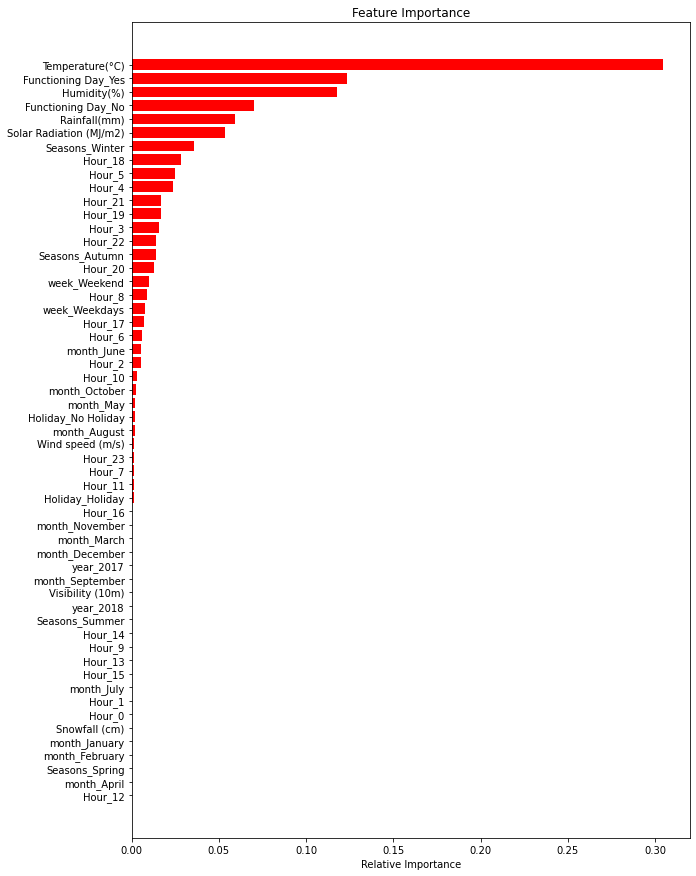

In [ ]:
#plot the feature importance
plt.figure(figsize=[10,15])
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Training Gradient Regressor with GridsearchCV

In [ ]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=100)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_gd_g = gb_optimal_model.predict(X_train)
y_pred_test_gd_g= gb_optimal_model.predict(X_test)

In [ ]:
#gd with grid cv train performance
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gd_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gd_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gd_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9497801781511271
MSE : 7.702191174843461
RMSE : 2.7752821793186113
R2 : 0.9497801781511271
Adjusted R2 : 0.9481515872303206


In [ ]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_gd_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_gd_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_gd_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9497801781511271
MSE : 11.547166499836687
RMSE : 3.3981121964756675
R2 : 0.9284890167596597
Adjusted R2 : 0.9261699695437289


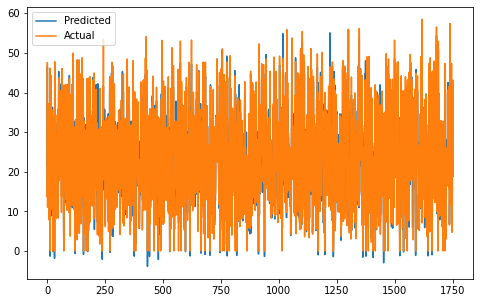

In [ ]:
#pred vs actual for Gradient boosting
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_gd_g)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Implementing Xgboost Regressor

In [ ]:
# Create an instance of the RandomForestRegressor
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[12:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_xg = xg_model.predict(X_train)
y_pred_test_xg = xg_model.predict(X_test)

In [ ]:
#xg boost on train data
print("Model Score:",xg_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_xg)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8788731166518207
MSE : 18.577174860718465
RMSE : 4.3101246920151235
R2 : 0.8788731166518207
Adjusted R2 : 0.8749450632413549


In [ ]:
#Xg boost for test
MSE= mean_squared_error(y_test, y_pred_test_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_xg))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 22.24159657947084
RMSE : 4.716099721111805
R2 : 0.8622589844655445
Adjusted R2 : 0.8577921472872455


Feature importance selction

In [ ]:
xg_model.feature_importances_

array([0.06991999, 0.0458069 , 0.00295885, 0.00142355, 0.03722067,
       0.04233713, 0.        , 0.        , 0.00429457, 0.0210371 ,
       0.04163038, 0.03841898, 0.04196281, 0.02497254, 0.01319516,
       0.01768483, 0.        , 0.01242163, 0.00773251, 0.        ,
       0.        , 0.        , 0.        , 0.00326015, 0.01473478,
       0.04752452, 0.03444066, 0.02947202, 0.03742269, 0.03530069,
       0.00675126, 0.0928066 , 0.        , 0.01983261, 0.02954138,
       0.00851071, 0.        , 0.13051498, 0.        , 0.00986793,
       0.        , 0.        , 0.01593843, 0.00230329, 0.        ,
       0.        , 0.        , 0.0231083 , 0.00305692, 0.01066539,
       0.00446939, 0.01582234, 0.0016372 , 0.        , 0.        ],
      dtype=float32)

In [ ]:
importances = xg_model.feature_importances_

importance_dictxg = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_dfxg = pd.DataFrame(importance_dictxg)

In [ ]:
importance_dfxg['Feature Importance'] = round(importance_dfxg['Feature Importance'],2)

In [ ]:
xg_model.fit(X_train,y_train)

[12:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
features = X.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

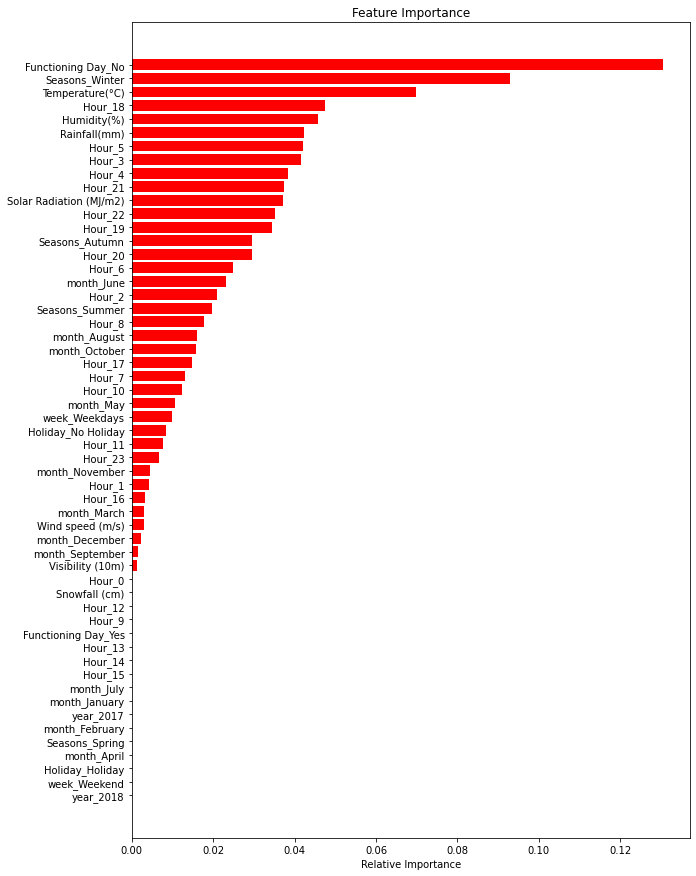

In [ ]:
plt.figure(figsize=[10,15])
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Training Xgboost regressor with Gridsearch

# Provide the range for Hyperparameter

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,'learning_rate': [0.1, 0.05, 0.01, 0.005]}

In [ ]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[12:17:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[12:17:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[12:17:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[12:17:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[12:17:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[12:17:30] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_grid.best_estimator_

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
xg_optimal_model = xg_grid.best_estimator_

In [ ]:
xg_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_x_g = xg_optimal_model.predict(X_train)
y_pred_test_x_g  = xg_optimal_model.predict(X_test)

In [ ]:
#xg after training score for train data
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9805010189267613
MSE : 2.990549834937528
RMSE : 1.7293206281478077
R2 : 0.9805010189267613
Adjusted R2 : 0.9798686816867683


In [ ]:
#Xg boost  after training for test
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9805010189267613
MSE : 10.648825082485597
RMSE : 3.2632537569863604
R2 : 0.934052397008936
Adjusted R2 : 0.9319137660157117


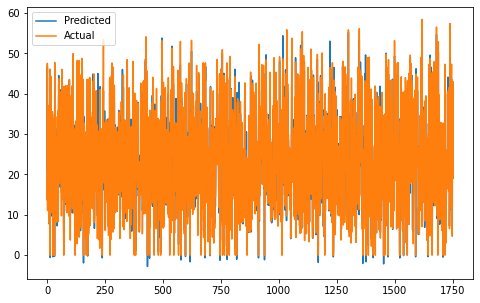

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_x_g))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Features importance with XGBOOST training

In [ ]:
xg_optimal_model.feature_importances_

array([0.02070522, 0.01632977, 0.00121297, 0.00123547, 0.00691715,
       0.0327633 , 0.00168421, 0.00277527, 0.00509738, 0.02779192,
       0.04754392, 0.05610408, 0.04916768, 0.02877294, 0.00672644,
       0.02267121, 0.00294206, 0.01720687, 0.00771788, 0.00126578,
       0.00171896, 0.00189539, 0.00217138, 0.00293663, 0.02870177,
       0.05793168, 0.03838213, 0.04303795, 0.05210502, 0.03620442,
       0.01620849, 0.04673607, 0.00169362, 0.00182623, 0.03255417,
       0.00319086, 0.        , 0.20514557, 0.        , 0.00715728,
       0.        , 0.00128837, 0.01919004, 0.0028918 , 0.00090094,
       0.0004209 , 0.00615196, 0.01134367, 0.00396768, 0.00414202,
       0.00359633, 0.00784731, 0.00202977, 0.        , 0.        ],
      dtype=float32)

In [ ]:
importances = xg_optimal_model.feature_importances_

importance_dictxgt = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_dfxgt = pd.DataFrame(importance_dictxgt)

In [ ]:
importance_dfxgt['Feature Importance'] = round(importance_dfxgt['Feature Importance'],2)

In [ ]:
importance_dfxgt.head()

Feature  Feature Importance
0          Temperature(°C)                0.02
1              Humidity(%)                0.02
2         Wind speed (m/s)                0.00
3         Visibility (10m)                0.00
4  Solar Radiation (MJ/m2)                0.01

In [ ]:
importance_dfxgt.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
37       Functioning Day_No                0.21
25                  Hour_18                0.06
11                   Hour_4                0.06
10                   Hour_3                0.05
28                  Hour_21                0.05
12                   Hour_5                0.05
31           Seasons_Winter                0.05
26                  Hour_19                0.04
27                  Hour_20                0.04
29                  Hour_22                0.04
24                  Hour_17                0.03
5              Rainfall(mm)                0.03
13                   Hour_6                0.03
34           Seasons_Autumn                0.03
9                    Hour_2                0.03
30                  Hour_23                0.02
1               Humidity(%)                0.02
42             month_August                0.02
0           Temperature(°C)                0.02
15                   Hour_8                0.02
17                  Hour_10                0.02
8                    Hour_1                0.01
4   Solar Radiation (MJ/m2)                0.01
46               month_July                0.01
47               month_June                0.01
14                   Hour_7                0.01
39            week_Weekdays                0.01
18                  Hour_11                0.01
51            month_October                0.01
50           month_November                0.00
41              month_April                0.00
49                month_May                0.00
48              month_March                0.00
52          month_September                0.00
53                year_2017                0.00
45            month_January                0.00
44           month_February                0.00
43           month_December                0.00
2          Wind speed (m/s)                0.00
19                  Hour_12                0.00
3          Visibility (10m)                0.00
40             week_Weekend                0.00
38      Functioning Day_Yes                0.00
20                  Hour_13                0.00
36          Holiday_Holiday                0.00
35       Holiday_No Holiday                0.00
33           Seasons_Summer                0.00
32           Seasons_Spring                0.00
6             Snowfall (cm)                0.00
7                    Hour_0                0.00
16                   Hour_9                0.00
23                  Hour_16                0.00
22                  Hour_15                0.00
21                  Hour_14                0.00
54                year_2018                0.00

In [ ]:
features = X.columns
importances = xg_optimal_model.feature_importances_
indices = np.argsort(importances)

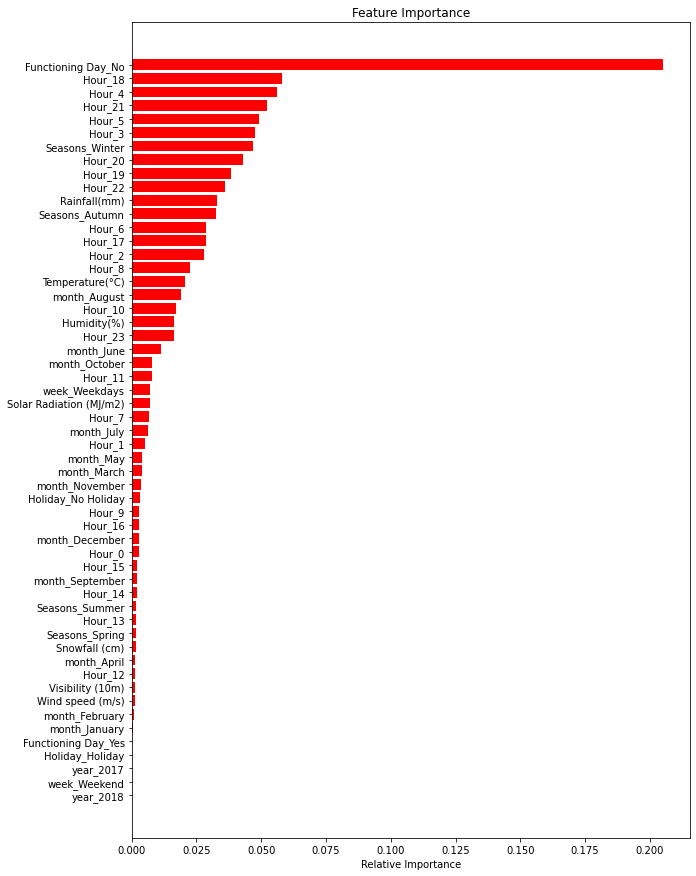

In [ ]:
plt.figure(figsize=[10,15])
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Model Summary for the train data set

In [ ]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','34.1712',' 5.8456','0.7771',' 0.7699'])
train.add_row(['2','lasso Regression','34.1776','5.8461','0.7771','0.7699'])
train.add_row(['3','Ridge Regression','34.1739','5.8458','0.7771','0.7699'])
train.add_row(['4','Elastic net regressor','34.1788','5.8462','0.7771','0.7699'])
train.add_row(['4','Polyomial Features','11.09','3.3305','0.9276','0.9253'])
train.add_row(['5','Decision Tree regressor','51.4765','7.1747','0.6643','0.6534'])
train.add_row(['6','Random forest regressor','1.5286','1.2363','0.9900','0.9897'])
train.add_row(['7','Gradient Boost','18.3104','4.2790','0.8806','0.8767'])
train.add_row(['8','XGBoost','2.9905','1.7293','0.9805','0.9798'])
print(train)

+-------+-------------------------+-----------+------------+-----------+--------------------+
| SL NO |        MODEL_NAME       | Train MSE | Train RMSE | Train R^2 | Train Adjusted R^2 |
+-------+-------------------------+-----------+------------+-----------+--------------------+
|   1   |    Linear Regression    |  34.1712  |   5.8456   |   0.7771  |       0.7699       |
|   2   |     lasso Regression    |  34.1776  |   5.8461   |   0.7771  |       0.7699       |
|   3   |     Ridge Regression    |  34.1739  |   5.8458   |   0.7771  |       0.7699       |
|   4   |  Elastic net regressor  |  34.1788  |   5.8462   |   0.7771  |       0.7699       |
|   4   |    Polyomial Features   |   11.09   |   3.3305   |   0.9276  |       0.9253       |
|   5   | Decision Tree regressor |  51.4765  |   7.1747   |   0.6643  |       0.6534       |
|   6   | Random forest regressor |   1.5286  |   1.2363   |   0.9900  |       0.9897       |
|   7   |      Gradient Boost     |  18.3104  |   4.2790   |

# Model Summary for the test data set

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','36.4431.','6.0368','0.7743','0.7669'])
test.add_row(['2','lasso Regression', '36.4923','6.0408','0.7740','0.7666'])
test.add_row(['3','Ridge Regression','36.4616','6.0383','0.7741','0.7668'])
test.add_row(['4','Elastic net regressor','36.4981','6.0413','0.7739','0.7666'])
test.add_row(['4','Polynomial Feature','17.2945','4.1586','0.8928','0.8894'])
test.add_row(['5','Decision Tree regressor','57.331','7.5708','0.6450','0.6335'])
test.add_row(['6','Random forest regressor','10.9497','3.3090','0.9321','0.9299'])
test.add_row(['7','Gradient Boost','22.2317','4.7150','0.8623','0.8578'])
test.add_row(['8','XGBoost','10.6488','3.2632','0.9340','0.9319'])
print(test)

+-------+-------------------------+----------+-----------+----------+-------------------+
| SL NO |        MODEL_NAME       | Test MSE | Test RMSE | Test R^2 | Test Adjusted R^2 |
+-------+-------------------------+----------+-----------+----------+-------------------+
|   1   |    Linear Regression    | 36.4431. |   6.0368  |  0.7743  |       0.7669      |
|   2   |     lasso Regression    | 36.4923  |   6.0408  |  0.7740  |       0.7666      |
|   3   |     Ridge Regression    | 36.4616  |   6.0383  |  0.7741  |       0.7668      |
|   4   |  Elastic net regressor  | 36.4981  |   6.0413  |  0.7739  |       0.7666      |
|   4   |    Polynomial Feature   | 17.2945  |   4.1586  |  0.8928  |       0.8894      |
|   5   | Decision Tree regressor |  57.331  |   7.5708  |  0.6450  |       0.6335      |
|   6   | Random forest regressor | 10.9497  |   3.3090  |  0.9321  |       0.9299      |
|   7   |      Gradient Boost     | 22.2317  |   4.7150  |  0.8623  |       0.8578      |
|   8   | 

# Conclusion:

Observation
From all these pointplot we have observed a lot from every column like :

#Season
In the season column, we are able to understand that the demand is low in the winter season and highest in summer

#Holiday
In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

#Functioning Day
In the Functioning Day column, If there is no Functioning Day then there is no demand

#Week
In the week column, We can observe from this column that the pattern of weekdays and weekends is different. In the weekend the demand becomes high in the afternoon as people loves to travel during this hour . While the demand during office timings is high in weekdays

#month
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.It is high during July and June time as there might be vacations and peoplr love to enjoy outings

#year
The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it.

# hour
The hours of the day and the demand for rented bikes were most correlated and it makes sense also. Highest number of bikes rented at the 18th hour of day.

On the basis of model evaluation metrics XGBOOST AND RANDOM FOREST are giving best results followed by Linear Regression. 

The important features for bike rented prediction is temperature followedby humidity and hour of day